In [22]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
x = pd.DataFrame(data.data, columns=[data.feature_names])
y = pd.Series(data.target)

In [23]:
x.columns.dtypes

level_0    object
dtype: object

In [24]:

#Transformar o MultiIndex em um Index simples
x.columns = ['_'.join(map(str, col)) for col in x.columns.to_flat_index()]

In [25]:
x.head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=9)

model = LogisticRegression(C=95, penalty='l1', solver='liblinear')
model.fit(x_train, y_train)
result = model.score(x_test, y_test)
result

0.9766081871345029

In [27]:
predict = model.predict(x_test)
predict

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1])

In [28]:
predict = model.predict_proba(x_test)
predict

array([[7.92824504e-01, 2.07175496e-01],
       [1.11639634e-01, 8.88360366e-01],
       [1.00000000e+00, 3.04384011e-14],
       [1.07621730e-01, 8.92378270e-01],
       [1.90287907e-05, 9.99980971e-01],
       [1.00000000e+00, 2.57455859e-20],
       [1.00000000e+00, 5.53635944e-15],
       [1.00000000e+00, 2.25960874e-11],
       [4.28005962e-06, 9.99995720e-01],
       [9.99999993e-01, 6.71092927e-09],
       [1.00000000e+00, 3.06967360e-14],
       [1.91874897e-05, 9.99980813e-01],
       [3.71310648e-06, 9.99996287e-01],
       [5.20575903e-05, 9.99947942e-01],
       [9.99999889e-01, 1.11152249e-07],
       [1.69752640e-02, 9.83024736e-01],
       [2.80169946e-06, 9.99997198e-01],
       [2.97720731e-02, 9.70227927e-01],
       [1.67157361e-06, 9.99998328e-01],
       [3.15529332e-07, 9.99999684e-01],
       [1.00000000e+00, 2.73686473e-35],
       [3.00368975e-07, 9.99999700e-01],
       [9.78315706e-04, 9.99021684e-01],
       [1.00000000e+00, 1.70703924e-10],
       [8.541052

In [29]:
probs = predict[:,1] # contém as probabilidades da classe positiva (1).
probs

array([2.07175496e-01, 8.88360366e-01, 3.04384011e-14, 8.92378270e-01,
       9.99980971e-01, 2.57455859e-20, 5.53635944e-15, 2.25960874e-11,
       9.99995720e-01, 6.71092927e-09, 3.06967360e-14, 9.99980813e-01,
       9.99996287e-01, 9.99947942e-01, 1.11152249e-07, 9.83024736e-01,
       9.99997198e-01, 9.70227927e-01, 9.99998328e-01, 9.99999684e-01,
       2.73686473e-35, 9.99999700e-01, 9.99021684e-01, 1.70703924e-10,
       9.99145895e-01, 9.94730280e-01, 9.98443027e-01, 9.99999993e-01,
       9.99997732e-01, 2.10377269e-14, 1.00568393e-13, 9.92396037e-01,
       8.25508694e-04, 6.87983505e-03, 2.61174174e-07, 1.38153687e-13,
       3.90285700e-15, 9.95757322e-01, 7.90492576e-08, 9.99996165e-01,
       5.85230058e-01, 7.38582795e-01, 9.99838949e-01, 9.99985514e-01,
       9.99948487e-01, 9.99999674e-01, 2.72821445e-01, 3.55377181e-21,
       8.61960661e-01, 5.21928342e-05, 2.41810772e-01, 9.99343558e-01,
       9.99995401e-01, 9.99993821e-01, 2.95789306e-17, 9.99715534e-01,
      

In [30]:
from sklearn.metrics import roc_curve
# fpr = false positve rates
# tpr = true positive rates
# thresholds = point in the sigmoid function
fpr, tpr, thresholds = roc_curve(y_test, probs)
print(fpr, '\n', tpr, '\n', thresholds )

[0.         0.         0.         0.01612903 0.01612903 0.03225806
 0.03225806 0.0483871  0.0483871  0.09677419 0.09677419 1.        ] 
 [0.         0.00917431 0.91743119 0.91743119 0.95412844 0.95412844
 0.98165138 0.98165138 0.99082569 0.99082569 1.         1.        ] 
 [2.00000000e+00 9.99999998e-01 9.30166174e-01 9.22100423e-01
 8.92378270e-01 8.88360366e-01 7.36201637e-01 6.73673382e-01
 5.85230058e-01 2.41810772e-01 2.16801149e-01 3.81201451e-46]


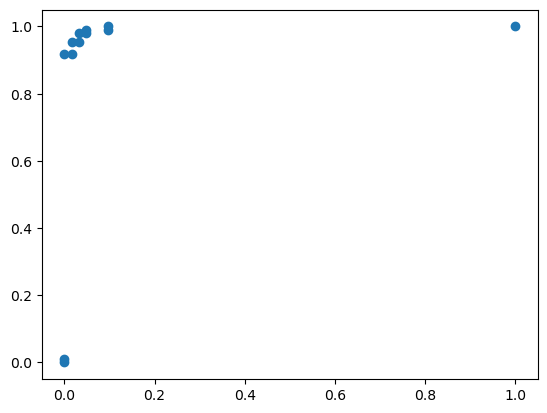

In [31]:
import matplotlib.pyplot as plt
plt.scatter(fpr,tpr)
plt.show()

In [32]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, probs)

0.9971885173128144